# Testbed for figuring out tunable reconstruction

Taking from the paper:
https://arxiv.org/pdf/1511.00758.pdf

# Imports and setups:


In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import os 
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import Delaunay



# sys.path.insert(0, '/home/kats/Documents/Repos/aru-core/build/lib')
# import aru_py_mesh
import sys
sys.path.insert(0,"/home/kats/Documents/My Documents/UCT/Masters/Code/Modular files")
# import DatasetHandler

import Kitti_Dataset_Files_Handler

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)


## Loading the dataset

In [4]:
# depth_data = Kitti_Dataset_Files_Handler.get_file_path_dataset()
# df = pd.DataFrame(data)
# df = df.sample(frac=1, random_state=42) #Randomising for non sequential data

# stereo_data = Kitti_Dataset_Files_Handler.get_kitti_standard_file_path_dataset()
# stereo_df = pd.DataFrame(stereo_data)
# stereo_df

import pykitti

# /home/kats/Documents/My Documents/Datasets/KITTI_cvlibs/2011_09_26/2011_09_26_drive_0001_sync
base = r"/home/kats/Documents/My Documents/Datasets/KITTI_cvlibs/"
date = "2011_09_26"
drive = "0001"

data = pykitti.raw(base, date, drive)

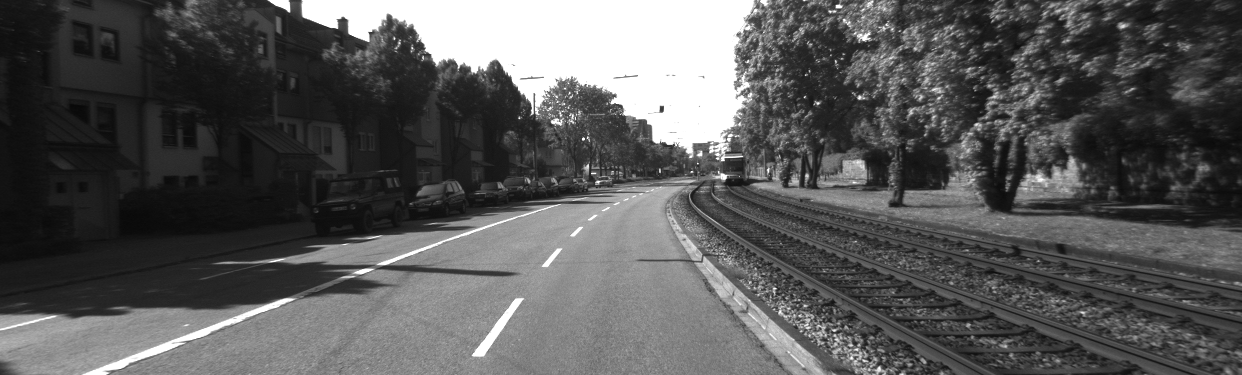

In [5]:
data.get_cam0(0)

Sample of data:

In [6]:
# fig, ax = plt.subplots(3,1)
# fig.tight_layout()
# img = cv2.imread(df["image"][0])
# ax[0].imshow(img)
# ax[0].set_title("Image")


# d = cv2.imread(df["depth"][0])
# ax[1].imshow(cv2.dilate(d, np.ones((2,2))))
# ax[1].set_title("Depth")


# d_d = np.load(df["dense"][0])
# # plt.imshow(cv2.dilate(d_d, np.ones((2,2))))
# ax[2].imshow(d_d)
# ax[2].set_title("Dense Depth")

# ax[0].axis('off')
# ax[1].axis('off')
# ax[2].axis('off')

# plt.show()



# Implementig Tunable Reconstruction

## Super Parameters

In [7]:
NUM_INITIAL_FEATURES = 50


## Extracting features 

In [8]:
import ImgFeatureExtactorModule as ft

Imported cv2
Imported numpy as np


In [25]:
# img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [26]:
# type(img[0,0,0])

Text(0.5, 1.0, 'Right')

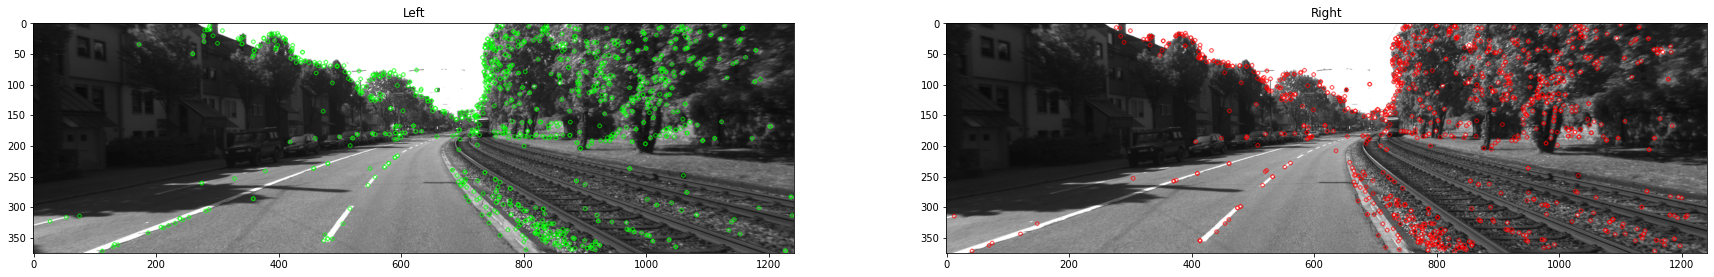

In [33]:
fig, ax = plt.subplots(1,2, figsize = (30,10))

img0 = np.array(data.get_cam0(0))
img1 = np.array(data.get_cam1(0))

# orb = ft.FeatureDetector(det_type='orb', max_num_ft=1000)
sift = ft.FeatureDetector(det_type='sift', max_num_ft=1000)
kp0 = sift.detect(img0)
kp1 = sift.detect(img1)


ax[0].imshow( cv2.drawKeypoints(img0, kp0, img0, color=(0,255,0)))
ax[0].set_title("Left")

ax[1].imshow( cv2.drawKeypoints(img1, kp1, img1, color=(255,0,0)))
ax[1].set_title("Right")

## Extracting uv position from keypoints


In [ ]:
def keyPoint_to_UV(kps):
    """ returns np array of len(kp)x2"""
    uv = np.zeros((len(kps), 2))
    for i,k in enumerate(kps):
        pt = k.pt
        uv[i] = pt
        
    return uv

kp_uv = keyPoint_to_UV(kp)

## Getting Depth image and depth at keypoints

In [ ]:
# fig, ax= plt.subplots(2,2, figsize=(30,10))


# d_sampled = np.zeros((kp_uv.shape[0], 3))
# d_sampled[:, :2] = kp_uv
# d_sampled[:, 2] = d_d[kp_uv[:,1].round().astype(int), kp_uv[:,0].round().astype(int)]
# d_sampled = d_sampled[d_sampled[:,2]>=0,:]


# d_mesh = Delaunay(d_sampled[:,:2].round().astype(int))


# tmp = np.zeros(img.shape)
# ax[1,0].imshow(cv2.drawKeypoints(d_d.astype(np.uint8), kp,tmp , color=(255,0,0)))

# # sanity check to make sure that uv are the right way round in keypoint array
# ax[0,0].imshow(cv2.drawKeypoints(img.astype(np.uint8), kp,tmp , color=(100,255,0)))
# # ax[1,0].scatter(kp_uv[:,0], kp_uv[:,1])
# # ax[1,0].axis('equal')


# ax[1,1].imshow(img_bw, 'gray')

# sc = ax[0,1].scatter(d_sampled[:,0], d_sampled[:,1], c = d_sampled[:,2], cmap ='jet')
# divider = make_axes_locatable(ax[0,1])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cbar = plt.colorbar(sc, cax = cax)
# cbar.set_label("Depth [m]")

# ax[0,1].axis('off')
# ax[0,1].set_title("Features coloured by Depth")


# ax[1,1].imshow(img_bw, 'gray')
# ax[1,1].triplot(d_sampled[:,0], d_sampled[:,1], d_mesh.simplices)

# sc = ax[1,1].scatter(d_sampled[:,0], d_sampled[:,1], c = d_sampled[:,2], cmap ='jet')

# ax[1,1].axis('equal')
# ax[1,1].axis('off')
# ax[1,1].set_title("Mesh")


# plt.show()

# Getting Disparity for all features:

### Matching features

In [ ]:
# # Brute force matcher:


# # create BFMatcher object
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# # Match descriptors.
# matches = bf.match(des1,des2)

# # Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)

# # Draw first 10 matches.
# img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)

# plt.imshow(img3),plt.show()

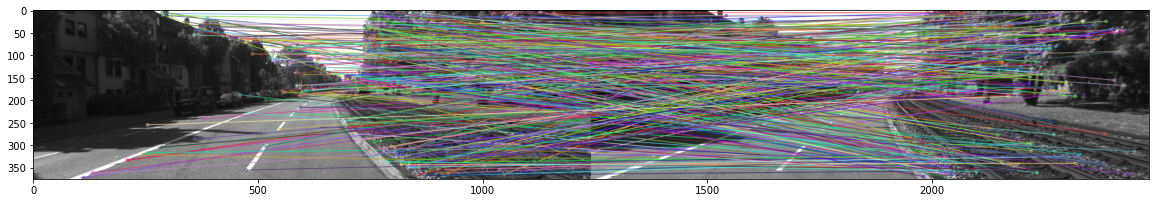

In [98]:
# find the keypoints and descriptors with SIFT
kp0, des0 = sift.detector.detectAndCompute(img0,None) # left
kp1, des1 = sift.detector.detectAndCompute(img1,None) # right

# BFMatcher with default params
bf = cv2.BFMatcher(normType = cv2.NORM_L2)
matches = bf.knnMatch(des1,des0, k=2) # img0 is train, img1 is query. Looking for right features in left

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = np.zeros(img0.shape)
img3 = cv2.drawMatchesKnn(img0,kp0,img1,kp1,good, img3,flags=2)

plt.imshow(img3)
plt.show()

In [99]:
ft_match_array = np.zeros((len(good),3)) # kp1, kp2, disparity
ft_match_array.shape

(417, 3)

In [101]:
for i,m in enumerate( good):
    m = m[0]
    ft_match_array[i,0] = m.trainIdx
    ft_match_array[i,1] = m.queryIdx
#     print(i," \t\t| ", ft_match_array[i])
    
    a = np.array(kp0[int(ft_match_array[i,0])].pt) 
    b = np.array(kp1[int(ft_match_array[i,1])].pt)
    d = np.linalg.norm(a-b)
    ft_match_array[i,2] = np.linalg.norm(np.array(kp0[int(ft_match_array[i,0])].pt) - np.array(kp1[int(ft_match_array[i,0])].pt))
#     print(ft_match_array[i])
#     print(i," \t\t| ", ft_match_array[i])
#     if i ==10: break

In [102]:
ft_match_array

array([[   3.        ,    1.        ,  892.82758303],
       [ 439.        ,    4.        ,  213.22496134],
       [  18.        ,    8.        ,  819.89482249],
       ...,
       [ 236.        ,  995.        ,   41.13158926],
       [ 935.        ,  996.        ,  212.55076644],
       [ 874.        , 1000.        ,  163.26711611]])

<!-- 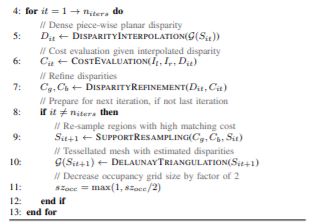 -->
# Now for the iterative part:

<div>
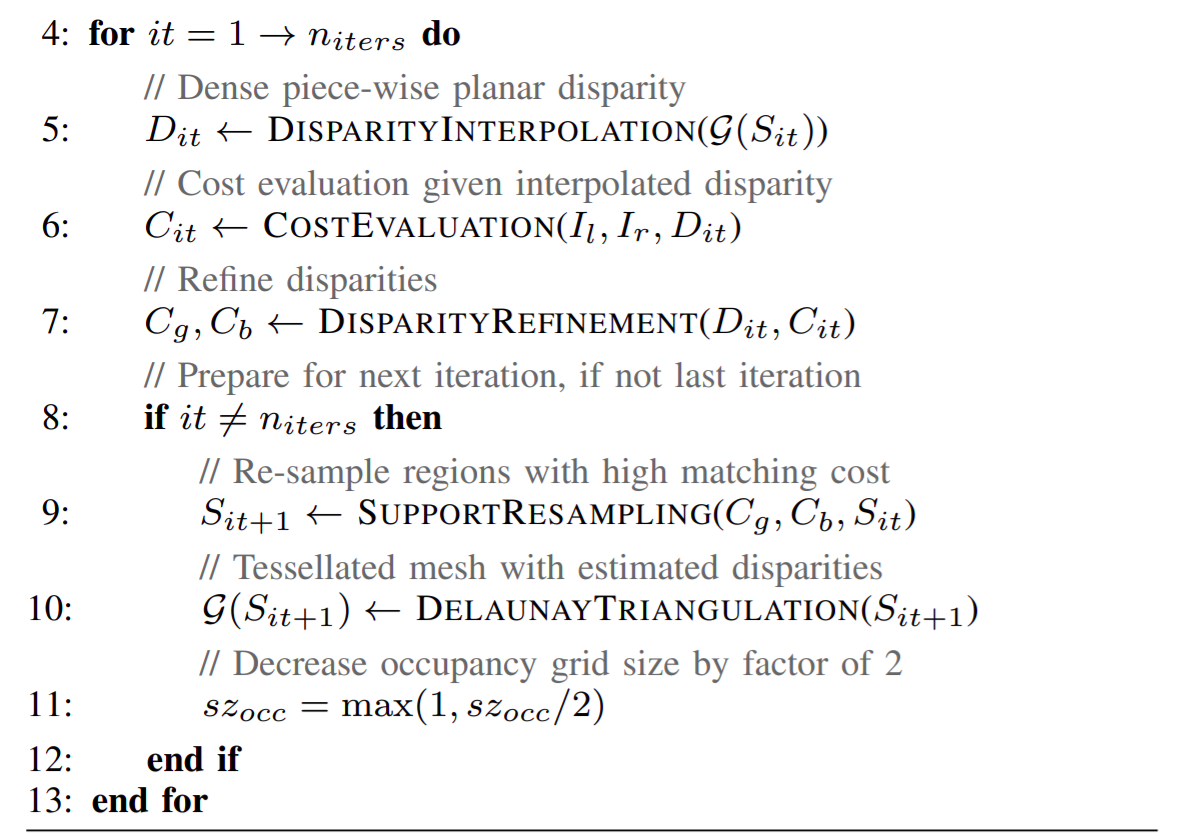
</div>


## Disparity Interpolation

This is mainly for stero but there's a useful part where all the planar equations for each triangle in the mesh are estimated and determined. 

The plane of a triangle, can be described by its 3D plane parameters $(\pi_1, \pi_2, \pi_3, \pi_4) \in R^4$ given by:

$\pi_1X + \pi_2Y + \pi_3Z + \pi_4 = 0$


<br>
For a stereo setup with a known baseline B, and known calibration ($u = fX/Z, v = fY /Z, and d = fB/Z$), the above equation reduces to

$\pi'_1u + \pi'_2v + \pi'_3 =d$

where $\pi' = (\pi'_1, \pi'_2, \pi'_3) \in R^3$ are the plane parameters in
disparity space

In [33]:
# Finding plane parameters:

# 1. Get cross product of two vectors in the triangle to find the normal vector

# 2. Check that the normals all point in the +ve camera direction (or -ve. Whatever. Just make sure they're the same although this might not even be neccessary)

# 3. Find the constant term for the planar equation.

# 4. Be proud that you remembered second year maths

## Cost Evaluation

This is framed for stereo. 

Cost is determined based on the matching of 5x5 windows between left and right images. <br>
Based on the Census Matching Cost

This cost is then normalised and validated in the disparity refinement step. 


Disparity Refinement



In [60]:
data_dir = r"/home/kats/Documents/My Documents/Datasets/KITTI_cvlibs/2011_09_26/2011_09_26_drive_0001_sync"
folders = os.listdir(data_dir)

folder_paths = []
filenames = []
for f in folders:
    folder_paths.append(os.path.join(data_dir, f, "data"))
    for (_, _, file_names) in os.walk(folder_paths[-1]):
        filenames.append(file_names)
    

res = {folders[i]: filenames[i] for i in range(len(folders))}

In [61]:
pd.DataFrame(res)

,image_03,velodyne_points,image_00,image_01,image_02,oxts
0,0000000086.png,0000000026.bin,0000000086.png,0000000086.png,0000000086.png,0000000085.txt
1,0000000099.png,0000000030.bin,0000000099.png,0000000099.png,0000000099.png,0000000056.txt
2,0000000001.png,0000000107.bin,0000000001.png,0000000001.png,0000000001.png,0000000065.txt
3,0000000047.png,0000000086.bin,0000000047.png,0000000047.png,0000000047.png,0000000046.txt
4,0000000004.png,0000000018.bin,0000000004.png,0000000004.png,0000000004.png,0000000084.txt
...,...,...,...,...,...,...
103,0000000044.png,0000000037.bin,0000000044.png,0000000044.png,0000000044.png,0000000101.txt
104,0000000042.png,0000000017.bin,0000000042.png,0000000042.png,0000000042.png,0000000001.txt
105,0000000058.png,0000000098.bin,0000000058.png,0000000058.png,0000000058.png,0000000083.txt
106,0000000017.png,0000000082.bin,0000000017.png,0000000017.png,0000000017.png,0000000027.txt


In [72]:
tmp.calib

CalibData(T_velo_imu=array([[ 9.999976e-01,  7.553071e-04, -2.035826e-03, -8.086759e-01],
       [-7.854027e-04,  9.998898e-01, -1.482298e-02,  3.195559e-01],
       [ 2.024406e-03,  1.482454e-02,  9.998881e-01, -7.997231e-01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]), T_cam0_velo_unrect=array([[ 7.533745e-03, -9.999714e-01, -6.166020e-04, -4.069766e-03],
       [ 1.480249e-02,  7.280733e-04, -9.998902e-01, -7.631618e-02],
       [ 9.998621e-01,  7.523790e-03,  1.480755e-02, -2.717806e-01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]), P_rect_00=array([[721.5377,   0.    , 609.5593,   0.    ],
       [  0.    , 721.5377, 172.854 ,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ]]), P_rect_10=array([[ 721.5377,    0.    ,  609.5593, -387.5744],
       [   0.    ,  721.5377,  172.854 ,    0.    ],
       [   0.    ,    0.    ,    1.    ,    0.    ]]), P_rect_20=array([[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],